In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from datetime import datetime, timedelta

In [3]:
api_key='###add ur api key###'

In [4]:
channel_id='UC0RhatS1pyxInC00YKjjBqQ'

In [5]:
youtube=build('youtube','v3',developerKey=api_key)

In [6]:
def get_channel_stats(youtube,channel_id):
    
    request=youtube.channels().list(part='snippet,contentDetails,statistics',id=channel_id)
    
    response=request.execute()
    data = dict(Channel_name = response['items'][0]['snippet']['title'],
                Subscribers = response['items'][0]['statistics']['subscriberCount'],
                Views = response['items'][0]['statistics']['viewCount'],
                Total_videos = response['items'][0]['statistics']['videoCount'],
                playlist_id = response['items'][0]['contentDetails']['relatedPlaylists'])
    
    return data

In [7]:
channel_statistics=get_channel_stats(youtube,channel_id)
channel_statistics

{'Channel_name': 'GeeksforGeeks',
 'Subscribers': '641000',
 'Views': '65211293',
 'Total_videos': '2561',
 'playlist_id': {'likes': '', 'uploads': 'UU0RhatS1pyxInC00YKjjBqQ'}}

In [8]:
channel_data=pd.DataFrame(channel_statistics)
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
likes,GeeksforGeeks,641000,65211293,2561,
uploads,GeeksforGeeks,641000,65211293,2561,UU0RhatS1pyxInC00YKjjBqQ


In [9]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

In [10]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='GeeksforGeeks', 'playlist_id'].iloc[1]
playlist_id

'UU0RhatS1pyxInC00YKjjBqQ'

In [11]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 3000)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [12]:
video_ids=get_video_ids(youtube, playlist_id)

In [13]:
video_ids

['iOnGnUYWNLo',
 'hH4EtOUXxOg',
 '-MfwsJmlcKU',
 'N8nnp2OBDTs',
 'ub3KzaT6w2Y',
 '2QDMIZGeIC4',
 '45qWz27YjNY',
 'GaP1x4ubzw8',
 '1ECMlxC6jbs',
 'FJd4BB6CLF0',
 'uJn5LLzoqPQ',
 'hP9ficE9NHU',
 '7JGSxDlxK08',
 'cWx5bmyXEDc',
 'vjWLZYeqiN8',
 '6e0v_NhsFMQ',
 'GtwUUME5AuE',
 'NamulVnhsNk',
 '-7Emxpn8DXc',
 'Nup3enNhVbU',
 '2bPiFkt3Nmg',
 'iXIpnq_dKWo',
 'iWMR619Vxsk',
 'Jt7PpK5w9QM',
 'YBPHbwwOD1g',
 'l336TXj7678',
 'kXfdw5pEkeM',
 '8gwwlpBwr_s',
 'iaw3vRUSwHY',
 'da24YT3-KQo',
 'chYg2EAKW2A',
 '9C2S9XIlahc',
 'jL8VS-za5hM',
 '7cTq-4HJPG0',
 'Dcba-9x5Wpc',
 'I2WPAXQYh5M',
 'W2N6xm_OZxM',
 '9jGgXZV6tLw',
 'RS6A-Xj63BM',
 '3Nyj4pgRJJM',
 'Bsj3Zt5yetc',
 'y-SA-uP6AUE',
 'ELSBed8U35I',
 '6rEw_Vz6Ekg',
 'CyOh-WDfUvs',
 'T6_CHzjhwEc',
 'YGvt29YX_MA',
 'lvVrQI6S3V8',
 'uQFtOv5vp1A',
 'IowSWLoGkec',
 '34Ady4FD79k',
 'cd0iFrCDm7M',
 'baNfsN0SWWk',
 'DW8r1fACCLY',
 'YPTkw7rr408',
 '392InfvpaiE',
 'GDeoPHRqb5w',
 'fkrBf5odxiw',
 'qRmd49K1nK4',
 'A1eiNCZTiPs',
 'ogDt5qNy0es',
 '4hIgVUwtbPs',
 '_rQfmK

In [14]:
len(video_ids)

2562

In [34]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics,contentDetails',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Length=video['contentDetails']['duration'],
                               Link=f"https://www.youtube.com/watch?v={video['id']}"
                               )
            all_video_stats.append(video_stats)

    
    return all_video_stats

In [35]:
video_details = get_video_details(youtube, video_ids)

In [36]:
video_details

[{'Title': 'Complete Guide to Software Testing and Automation',
  'Published_date': '2023-08-05T22:22:47Z',
  'Views': '822',
  'Likes': '30',
  'Length': 'PT50M16S',
  'Link': 'https://www.youtube.com/watch?v=iOnGnUYWNLo'},
 {'Title': 'GeeksforGeeks',
  'Published_date': '2023-08-05T13:49:00Z',
  'Views': '634',
  'Likes': '55',
  'Length': 'PT50S',
  'Link': 'https://www.youtube.com/watch?v=hH4EtOUXxOg'},
 {'Title': 'Kickstarting your Content Creation Side Hustle | Steps to Success',
  'Published_date': '2023-08-04T23:29:26Z',
  'Views': '720',
  'Likes': '24',
  'Length': 'PT45M51S',
  'Link': 'https://www.youtube.com/watch?v=-MfwsJmlcKU'},
 {'Title': 'Printer Input Changes | GeeksforGeeks',
  'Published_date': '2023-08-04T14:08:00Z',
  'Views': '610',
  'Likes': '37',
  'Length': 'PT36S',
  'Link': 'https://www.youtube.com/watch?v=N8nnp2OBDTs'},
 {'Title': '3 Reasons Why You Should Learn GCP | GeeksforGeeks #shorts',
  'Published_date': '2023-08-03T16:19:00Z',
  'Views': '1120',
  

In [37]:
video_data = pd.DataFrame(video_details)

In [38]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Length'] = pd.to_timedelta(video_data['Length'])
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data

,Title,Published_date,Views,Likes,Length,Link
0,Complete Guide to Software Testing and Automation,2023-08-05,822,30,0 days 00:50:16,https://www.youtube.com/watch?v=iOnGnUYWNLo
1,GeeksforGeeks,2023-08-05,634,55,0 days 00:00:50,https://www.youtube.com/watch?v=hH4EtOUXxOg
2,Kickstarting your Content Creation Side Hustle...,2023-08-04,720,24,0 days 00:45:51,https://www.youtube.com/watch?v=-MfwsJmlcKU
3,Printer Input Changes | GeeksforGeeks,2023-08-04,610,37,0 days 00:00:36,https://www.youtube.com/watch?v=N8nnp2OBDTs
4,3 Reasons Why You Should Learn GCP | GeeksforG...,2023-08-03,1120,69,0 days 00:00:56,https://www.youtube.com/watch?v=ub3KzaT6w2Y
...,...,...,...,...,...,...
2557,Length of shortest chain to reach a target wor...,2016-04-01,41329,149,0 days 00:12:25,https://www.youtube.com/watch?v=6pIC20wCm20
2558,Binary Search | GeeksQuiz,2016-03-28,188625,818,0 days 00:07:33,https://www.youtube.com/watch?v=T2sFYY-fT5o
2559,Number of Triangles in an Undirected Graph | G...,2016-03-07,18209,76,0 days 00:08:44,https://www.youtube.com/watch?v=ChdNz1Ui1uc
2560,Write a program to print all permutations of a...,2016-01-06,478928,2045,0 days 00:11:52,https://www.youtube.com/watch?v=AfxHGNRtFac


In [39]:
dateSorted_videos = video_data.sort_values(by='Published_date', ascending=False)

In [40]:
dateSorted_videos

,Title,Published_date,Views,Likes,Length,Link
0,Complete Guide to Software Testing and Automation,2023-08-05,822,30,0 days 00:50:16,https://www.youtube.com/watch?v=iOnGnUYWNLo
1,GeeksforGeeks,2023-08-05,634,55,0 days 00:00:50,https://www.youtube.com/watch?v=hH4EtOUXxOg
2,Kickstarting your Content Creation Side Hustle...,2023-08-04,720,24,0 days 00:45:51,https://www.youtube.com/watch?v=-MfwsJmlcKU
3,Printer Input Changes | GeeksforGeeks,2023-08-04,610,37,0 days 00:00:36,https://www.youtube.com/watch?v=N8nnp2OBDTs
4,3 Reasons Why You Should Learn GCP | GeeksforG...,2023-08-03,1120,69,0 days 00:00:56,https://www.youtube.com/watch?v=ub3KzaT6w2Y
...,...,...,...,...,...,...
2548,Replace every element with the greatest elemen...,2016-04-01,31777,206,0 days 00:07:19,https://www.youtube.com/watch?v=bLb8e83OK7o
2558,Binary Search | GeeksQuiz,2016-03-28,188625,818,0 days 00:07:33,https://www.youtube.com/watch?v=T2sFYY-fT5o
2559,Number of Triangles in an Undirected Graph | G...,2016-03-07,18209,76,0 days 00:08:44,https://www.youtube.com/watch?v=ChdNz1Ui1uc
2560,Write a program to print all permutations of a...,2016-01-06,478928,2045,0 days 00:11:52,https://www.youtube.com/watch?v=AfxHGNRtFac


In [42]:
current_date = datetime.now()

In [43]:
six_months_ago = current_date - timedelta(days=180)

In [44]:
video_data_last_6_months = dateSorted_videos[dateSorted_videos['Published_date'] >= pd.to_datetime(six_months_ago)]

C:\Users\monis\AppData\Local\Temp\ipykernel_25008\239794448.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  video_data_last_6_months = dateSorted_videos[dateSorted_videos['Published_date'] >= pd.to_datetime(six_months_ago)]


In [45]:
video_data_last_6_months

,Title,Published_date,Views,Likes,Length,Link
0,Complete Guide to Software Testing and Automation,2023-08-05,822,30,0 days 00:50:16,https://www.youtube.com/watch?v=iOnGnUYWNLo
1,GeeksforGeeks,2023-08-05,634,55,0 days 00:00:50,https://www.youtube.com/watch?v=hH4EtOUXxOg
2,Kickstarting your Content Creation Side Hustle...,2023-08-04,720,24,0 days 00:45:51,https://www.youtube.com/watch?v=-MfwsJmlcKU
3,Printer Input Changes | GeeksforGeeks,2023-08-04,610,37,0 days 00:00:36,https://www.youtube.com/watch?v=N8nnp2OBDTs
4,3 Reasons Why You Should Learn GCP | GeeksforG...,2023-08-03,1120,69,0 days 00:00:56,https://www.youtube.com/watch?v=ub3KzaT6w2Y
...,...,...,...,...,...,...
197,Coders Tell Us: “Pyaar Kya Hai?”,2023-02-14,5634,230,0 days 00:01:00,https://www.youtube.com/watch?v=qIRBk1OkfoA
198,Roadmap To Master Recursion? Roadmap To Master...,2023-02-13,2411,112,0 days 00:01:52,https://www.youtube.com/watch?v=51JvvwqQmlQ
199,"Coder hun, Give up nhi karta… 🥹",2023-02-09,5379,142,0 days 00:00:07,https://www.youtube.com/watch?v=6a5CJuM3R_0
200,CodeCast Ep. 2 | SDE Without A Technical Degre...,2023-02-08,1900,77,0 days 00:06:55,https://www.youtube.com/watch?v=XlcpYRp0ouc


In [53]:
result=video_data_last_6_months.sort_values(by='Published_date', ascending=True)
result

,Title,Published_date,Views,Likes,Length,Link
201,The Art of Becoming a Successful Coder | Geeks...,2023-02-07,6739,339,0 days 00:15:06,https://www.youtube.com/watch?v=jO2SyGwS4bA
200,CodeCast Ep. 2 | SDE Without A Technical Degre...,2023-02-08,1900,77,0 days 00:06:55,https://www.youtube.com/watch?v=XlcpYRp0ouc
199,"Coder hun, Give up nhi karta… 🥹",2023-02-09,5379,142,0 days 00:00:07,https://www.youtube.com/watch?v=6a5CJuM3R_0
198,Roadmap To Master Recursion? Roadmap To Master...,2023-02-13,2411,112,0 days 00:01:52,https://www.youtube.com/watch?v=51JvvwqQmlQ
197,Coders Tell Us: “Pyaar Kya Hai?”,2023-02-14,5634,230,0 days 00:01:00,https://www.youtube.com/watch?v=qIRBk1OkfoA
...,...,...,...,...,...,...
4,3 Reasons Why You Should Learn GCP | GeeksforG...,2023-08-03,1120,69,0 days 00:00:56,https://www.youtube.com/watch?v=ub3KzaT6w2Y
3,Printer Input Changes | GeeksforGeeks,2023-08-04,610,37,0 days 00:00:36,https://www.youtube.com/watch?v=N8nnp2OBDTs
2,Kickstarting your Content Creation Side Hustle...,2023-08-04,720,24,0 days 00:45:51,https://www.youtube.com/watch?v=-MfwsJmlcKU
1,GeeksforGeeks,2023-08-05,634,55,0 days 00:00:50,https://www.youtube.com/watch?v=hH4EtOUXxOg


In [54]:
result.to_csv('GFG_last6months.csv')

In [56]:
result3=video_data_last_6_months.sort_values(by='Views', ascending=False).head(20)
result3

,Title,Published_date,Views,Likes,Length,Link
190,Learn System Design with GeeksforGeeks,2023-02-21,118333,633,0 days 00:00:36,https://www.youtube.com/watch?v=XQEZ07JhVuA
122,GeeksforGeeks Classroom Program | Now in Noida...,2023-05-08,108465,92,0 days 00:00:38,https://www.youtube.com/watch?v=16D2cuRy5JY
98,Free Summer Offline Classes on Python Programi...,2023-06-09,106927,53,0 days 00:00:37,https://www.youtube.com/watch?v=OOLXHwZzHfM
108,Full Stack Development | LIVE Classes | Geeksf...,2023-05-30,88718,77,0 days 00:00:35,https://www.youtube.com/watch?v=cBfC9HLR9Qk
127,Job Fair for Students | Till 25th May Only | G...,2023-05-02,82851,78,0 days 00:00:39,https://www.youtube.com/watch?v=1GEegOb3fHE
170,Master DSA Today and be the Masters of Tomorrow,2023-03-15,73478,318,0 days 00:00:25,https://www.youtube.com/watch?v=PsOXP5hg52w
83,DSA To Development: A Complete Coding Guide | ...,2023-06-19,48206,150,0 days 00:00:43,https://www.youtube.com/watch?v=phr8lXH2Ee0
165,Master Java Backend Development Live: Build Po...,2023-03-20,41265,584,0 days 00:00:29,https://www.youtube.com/watch?v=YR00_yMMD2Q
138,Create Your Own Apps Today | GeeksforGeeks,2023-04-17,34913,89,0 days 00:00:38,https://www.youtube.com/watch?v=LycNCWC3g18
153,Link in Comments| Master Python Backend Develo...,2023-03-31,30245,201,0 days 00:00:39,https://www.youtube.com/watch?v=OAMRaoId5Mk


In [57]:
result3.to_csv('GFG_mostViewed.csv')

In [58]:
result4=video_data_last_6_months.sort_values(by='Length', ascending=False).head(20)
result4

,Title,Published_date,Views,Likes,Length,Link
144,SDE Preparation in 3 hours,2023-04-05,3181,154,0 days 02:55:27,https://www.youtube.com/watch?v=ftDoBLp-OfU
96,CodeCamp Day 2 | Exploring Arrays and Problem ...,2023-06-11,7031,308,0 days 02:29:20,https://www.youtube.com/watch?v=OMHeYpQCCPE
77,CodeCamp Day 13 | Discovering Graph Traversal ...,2023-06-22,1023,45,0 days 02:14:24,https://www.youtube.com/watch?v=hgkjJD5hb5g
68,CodeCamp Day 19 | Exploring Advanced Topics in...,2023-06-28,1526,48,0 days 02:13:39,https://www.youtube.com/watch?v=kLZGFHK_bIc
81,CodeCamp Day 11 | Journey into Binary Trees,2023-06-20,1412,64,0 days 02:10:41,https://www.youtube.com/watch?v=U1UKjsA4jNg
71,CodeCamp Day 17 | Mastering Greedy Algorithms,2023-06-26,1527,54,0 days 02:10:21,https://www.youtube.com/watch?v=S_0_KBouYrA
69,CodeCamp Day 18 | Conquering Divide and Conque...,2023-06-27,1144,45,0 days 02:09:30,https://www.youtube.com/watch?v=YMj4eEePFhY
97,CodeCamp Day 1 | DSA Fundamentals and Problem-...,2023-06-10,24428,947,0 days 02:08:37,https://www.youtube.com/watch?v=Zdp5vIHP9-c
82,CodeCamp Day 10 | Tackling Complex Problems wi...,2023-06-19,1303,57,0 days 02:08:23,https://www.youtube.com/watch?v=LfnOtw-og8Q
93,CodeCamp Day 4 | Understanding Stacks and Queu...,2023-06-13,2322,95,0 days 02:05:01,https://www.youtube.com/watch?v=zHSfIM0Wf-Q


In [59]:
result4.to_csv('GFG_HighestVideoLength.csv')

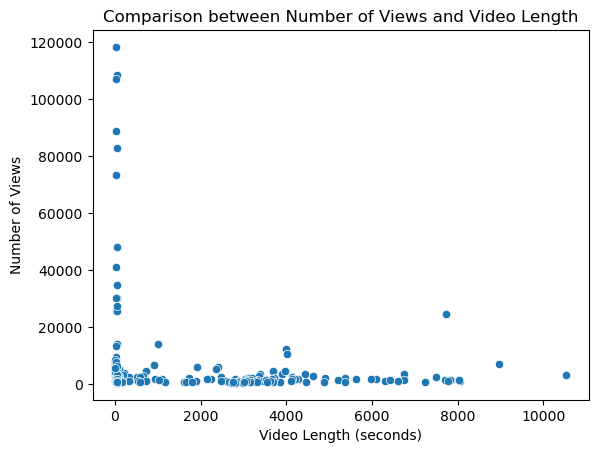

In [64]:
result['Length'] = result['Length'].apply(lambda x: x.total_seconds() if x != 'N/A' else None)

sns.scatterplot(data=result, x='Length', y='Views')
plt.xlabel('Video Length (seconds)')
plt.ylabel('Number of Views')
plt.title('Comparison between Number of Views and Video Length')
plt.show()


In [ ]:
# Given Questions
# 1.Number of videos in the past 6 months from the start date. Must mention the dates in the solution.
# 2. Create a pandas data frame with columns name as videos title, views, Length of videos, and videos link
# 3. Name the most viewed topics in the past 6 months.
# 4. Name the topics with the highest video length.
# 5. Make a comparison between the number of views and video length using a Graph.